# Unit 5 - Financial Planning

In [57]:
# Initial imports
import os
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [58]:
# Load .env enviroment variables
load_dotenv('api.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [59]:
# Set current amount of crypto assets
# the Emergency portfolio we are studying at this moment has the follown cryptocurrencies:

# YOUR CODE HERE!

# Bitcoin = 1.2 coins
# Ethereum = 5.3 coins
my_btc = 1.2
my_eth = 5.3

# the monthly income is 12,000
monthly_income = 12000


In [60]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [61]:
# Fetch current BTC price
# YOUR CODE HERE!

# Execute the GET to create deck url
response_data = requests.get(btc_url)
    
# Format data as JSON to get deck_id
data = response_data.json()

crypto_data = response_data.json()
print(crypto_data)


{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19351881, 'total_supply': 19351881, 'max_supply': 21000000, 'quotes': {'USD': {'price': 28200.0, 'volume_24h': 22417369267, 'market_cap': 547013249412, 'percentage_change_1h': -0.322186007221703, 'percentage_change_24h': -1.99462520282876, 'percentage_change_7d': -5.69748772265658, 'percent_change_1h': -0.322186007221703, 'percent_change_24h': -1.99462520282876, 'percent_change_7d': -5.69748772265658}}, 'last_updated': 1682033231}}, 'metadata': {'timestamp': 1682033231, 'num_cryptocurrencies': 3119, 'error': None}}


In [62]:
bitcoin_price = crypto_data['data']['1']['quotes']['USD']['price']
bitcoin_price

28200.0

In [63]:
# Fetch current ETH price
# YOUR CODE HERE!

# Execute the GET to create deck url
response_data = requests.get(eth_url)
    
# Format data as JSON to get deck_id
data = response_data.json()

crypto_data = response_data.json()
print(crypto_data)


{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 120428890, 'total_supply': 120428890, 'max_supply': 120428890, 'quotes': {'USD': {'price': 1939.65, 'volume_24h': 12717019537, 'market_cap': 233944422638, 'percentage_change_1h': -0.347898057497145, 'percentage_change_24h': 0.20541670967748, 'percentage_change_7d': 1.01151271607029, 'percent_change_1h': -0.347898057497145, 'percent_change_24h': 0.20541670967748, 'percent_change_7d': 1.01151271607029}}, 'last_updated': 1682033227}}, 'metadata': {'timestamp': 1682033227, 'num_cryptocurrencies': 3119, 'error': None}}


In [64]:
ethereum_price = crypto_data['data']['1027']['quotes']['USD']['price']
ethereum_price

1939.65

In [65]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * bitcoin_price
my_eth_value = my_eth * ethereum_price

crypto_wallet = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")

print(f"The total value of my crypto wallet is: ${crypto_wallet:0,.2f}")

The current value of your 1.2 BTC is $33,840.00
The current value of your 5.3 ETH is $10,280.15
The total value of my crypto wallet is: $44,120.15


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [66]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}, the value of the key is: {alpaca_api_key}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}, the value of the key is: {alpaca_secret_key}")


Alpaca Key type: <class 'str'>, the value of the key is: PKLABUBQYQP4V78G01SK
Alpaca Secret Key type: <class 'str'>, the value of the key is: taiagAW1vDuVscYv27d3YEAUBDTHwewUIijN2mAu


In [67]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [68]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Set the tickers
tickers = ["AGG", "SPY"]

In [69]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-07-14 04:00:00+00:00,118.58,118.74,118.58,118.67,3986756,14580,118.667216,AGG
2020-07-14 04:00:00+00:00,313.30,319.76,312.00,318.93,93545651,580270,316.244144,SPY


In [70]:
# Reorganize the DataFrame
# Get the individual data for each symbol SPY and AGG

agg_df=df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
spy_df=df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


In [71]:
agg_df

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-07-14 04:00:00+00:00,118.58,118.74,118.58,118.67,3986756,14580,118.667216


In [72]:
spy_df

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-07-14 04:00:00+00:00,313.3,319.76,312.0,318.93,93545651,580270,316.244144


In [73]:
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([agg_df, spy_df],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-07-14 04:00:00+00:00  118.58  118.74  118.58  118.67  3986756   

                                                     SPY                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2020-07-14 04:00:00+00:00       14580  118.667216  313.3  319.76  312.0   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-07-14 04:00:00+00:00  318.93  93545651      580270  316.244144

In [74]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio.iloc[0]['AGG'].close
spy_close_price = df_portfolio.iloc[0]['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.67
Current SPY closing price: $318.93


In [75]:
# Set current amount of shares
my_agg = 200
my_spy = 110

# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

market_portfolio = my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")
print(f"The total value of the stock/bond portfolio is: ${market_portfolio:,.2f}")

The current value of your 110 SPY shares is $35,082.30
The current value of your 200 AGG shares is $23,734.00
The total value of the stock/bond portfolio is: $58,816.30


### Savings Health Analysis

In [76]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = (crypto_wallet, market_portfolio)

monthly_income, savings_data
# Create savings DataFrame
index = ('crypto_wallet', 'stocks/bonds')
# df_savings = pd.DataFrame(savings_data, columns=["Amount"], index=index)
df_savings = pd.DataFrame({"Amount": savings_data}, index=index)

df_savings
df_savings['Amount'].sum()

# Display savings DataFrame
display(df_savings)


,Amount
crypto_wallet,44120.145
stocks/bonds,58816.300


In [77]:
# Set ideal emergency fund
emergency_fund_value = monthly_income * 3

print(f"the emergnecy fund needed is: ${emergency_fund_value:,.2f}")
print(f"the savings at this moment are: ${df_savings['Amount'].sum():,.2f}")

the emergnecy fund needed is: $36,000.00
the savings at this moment are: $102,936.45


# Validate saving health

In [78]:
# print the financial situation with respect to the emergency fund:

if df_savings['Amount'].sum() > emergency_fund_value:
    print(" Congratulations, you have a good sized emergency fund. Keep up with your finances")
elif df_savings['Amount'].sum() == emergency_fund_value:
    print(" Congratulations on reaching this important financial goal, but you need to save a little more to keep with inflation.")
elif df_savings['Amount'].sum() < emergency_fund_value:
    print(f" You are doing good working on your financial safety, but you still have to build on your emergency fund, you need to save: ${emergency_fund_value - total_portfolio:.2f}")
    

 Congratulations, you have a good sized emergency fund. Keep up with your finances


Text(0, 0.5, '')

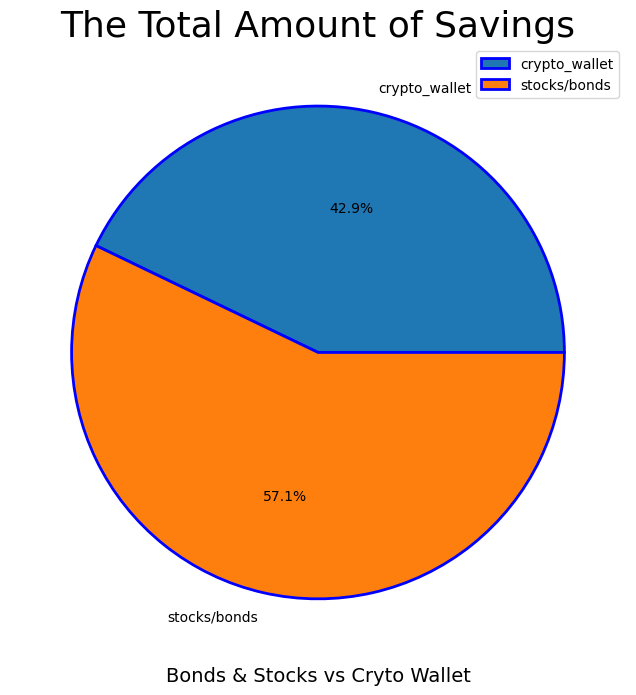

In [79]:
# Plot savings pie chart
pf_components = (df_savings.iloc[0].index, df_savings.iloc[1].index)

# Plotting the pie chart for above dataframe
df_savings.plot(kind='pie', subplots=True, figsize=(8, 8), wedgeprops = {'linewidth': 2, "edgecolor" :"b"}, autopct='%1.1f%%')
plt.title('The Total Amount of Savings', fontsize = 26)
plt.xlabel('Bonds & Stocks vs Cryto Wallet', fontsize = 14)
plt.ylabel("")

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [80]:
# define function to set the time for the return period

def set_cumulative_return_period(start, end):
    s_date = pd.Timestamp(start, tz='America/New_York').isoformat()
    e_date = pd.Timestamp(end, tz='America/New_York').isoformat()
    
    return s_date, e_date


In [81]:
# Get 3 years' worth of historical data for SPY and AGG
# Sample results may vary from the solution based on the time frame chosen

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Set the tickers
tickers = ["AGG", "SPY"]
weights_dist = [0.40, 0.60]

# Set start and end dates of three years back from today.
start_date, end_date = set_cumulative_return_period('2019-03-01', '2022-03-31')

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

# Reorganize the DataFrame
# Separate ticker data
agg_df=df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
spy_df=df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_df, spy_df],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2019-03-01 05:00:00+00:00  106.77  106.8400  106.6100  106.63   5726990   
2019-03-04 05:00:00+00:00  106.74  106.8399  106.6900  106.76   3837156   
2019-03-05 05:00:00+00:00  106.73  106.8400  106.6701  106.83   5835845   
2019-03-06 05:00:00+00:00  106.88  107.0700  106.8500  106.99   4834379   
2019-03-07 05:00:00+00:00  107.16  107.3500  107.1175  107.29   6089257   
...                           ...       ...       ...     ...       ...   
2022-03-25 04:00:00+00:00  106.57  106.6500  105.9750  106.10  10258985   
2022-03-28 04:00:00+00:00  106.25  106.5252  106.1600  106.36  16188038   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.4550  106.86  22782663   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.5900  107.15  23074521   
2022-03-31 04:00:00+00:00  107.17  107.3800  107.0600  107.10  13788220   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2019-03-01 05:00:00+00:00       19714  106.680536  280.44  280.880  278.820   
2019-03-04 05:00:00+00:00       15048  106.767174  281.60  281.870  276.840   
2019-03-05 05:00:00+00:00       13807  106.786952  279.54  279.760  278.410   
2019-03-06 05:00:00+00:00       16984  107.007262  279.15  279.160  276.970   
2019-03-07 05:00:00+00:00       15984  107.258649  276.83  276.990  274.070   
...                               ...         ...     ...      ...      ...   
2022-03-25 04:00:00+00:00       37433  106.189438  451.16  452.980  448.430   
2022-03-28 04:00:00+00:00       51656  106.295856  452.06  455.910  450.060   
2022-03-29 04:00:00+00:00       67269  106.734047  460.02  462.070  457.180   
2022-03-30 04:00:00+00:00       49910  107.007761  460.34  461.195  456.465   
2022-03-31 04:00:00+00:00       44817  107.229272  457.89  458.760  451.160   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-03-01 05:00:00+00:00  280.41   79633648      301253  280.121386  
2019-03-04 05:00:00+00:00  279.38  106736618      451992  279.168090  
2019-03-05 05:00:00+00:00  279.06   59526170      234842  279.196449  
2019-03-06 05:00:00+00:00  277.34   75039771      290922  277.792850  
2019-03-07 05:00:00+00:00  275.13   95645689      435050  275.315040  
...                           ...        ...         ...         ...  
2022-03-25 04:00:00+00:00  452.69   76545292      655639  451.041696  
2022-03-28 04:00:00+00:00  455.84  131687956     1192521  453.304450  
2022-03-29 04:00:00+00:00  461.53  173082835     1475317  459.634235  
2022-03-30 04:00:00+00:00  458.79  159109186     1316482  459.159046  
2022-03-31 04:00:00+00:00  451.64  119151277      751165  455.454712  

[779 rows x 14 columns]

In [82]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [83]:
# Configuring a Monte Carlo simulation to forecast 3 years cumulative returns for a period of 30 years
# Set number of simulations
num_sims = 500
no_years = 30

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_Portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights_dist,
    num_simulation = num_sims,
    num_trading_days = 252*no_years
)

# Print the simulation input data
MC_Portfolio.portfolio_data

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2019-03-01 05:00:00+00:00  106.77  106.8400  106.6100  106.63   5726990   
2019-03-04 05:00:00+00:00  106.74  106.8399  106.6900  106.76   3837156   
2019-03-05 05:00:00+00:00  106.73  106.8400  106.6701  106.83   5835845   
2019-03-06 05:00:00+00:00  106.88  107.0700  106.8500  106.99   4834379   
2019-03-07 05:00:00+00:00  107.16  107.3500  107.1175  107.29   6089257   
...                           ...       ...       ...     ...       ...   
2022-03-25 04:00:00+00:00  106.57  106.6500  105.9750  106.10  10258985   
2022-03-28 04:00:00+00:00  106.25  106.5252  106.1600  106.36  16188038   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.4550  106.86  22782663   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.5900  107.15  23074521   
2022-03-31 04:00:00+00:00  107.17  107.3800  107.0600  107.10  13788220   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-03-01 05:00:00+00:00       19714  106.680536          NaN  280.44   
2019-03-04 05:00:00+00:00       15048  106.767174     0.001219  281.60   
2019-03-05 05:00:00+00:00       13807  106.786952     0.000656  279.54   
2019-03-06 05:00:00+00:00       16984  107.007262     0.001498  279.15   
2019-03-07 05:00:00+00:00       15984  107.258649     0.002804  276.83   
...                               ...         ...          ...     ...   
2022-03-25 04:00:00+00:00       37433  106.189438    -0.007948  451.16   
2022-03-28 04:00:00+00:00       51656  106.295856     0.002451  452.06   
2022-03-29 04:00:00+00:00       67269  106.734047     0.004701  460.02   
2022-03-30 04:00:00+00:00       49910  107.007761     0.002714  460.34   
2022-03-31 04:00:00+00:00       44817  107.229272    -0.000467  457.89   

                                                                            \
                              high      low   close     volume trade_count   
timestamp                                                                    
2019-03-01 05:00:00+00:00  280.880  278.820  280.41   79633648      301253   
2019-03-04 05:00:00+00:00  281.870  276.840  279.38  106736618      451992   
2019-03-05 05:00:00+00:00  279.760  278.410  279.06   59526170      234842   
2019-03-06 05:00:00+00:00  279.160  276.970  277.34   75039771      290922   
2019-03-07 05:00:00+00:00  276.990  274.070  275.13   95645689      435050   
...                            ...      ...     ...        ...         ...   
2022-03-25 04:00:00+00:00  452.980  448.430  452.69   76545292      655639   
2022-03-28 04:00:00+00:00  455.910  450.060  455.84  131687956     1192521   
2022-03-29 04:00:00+00:00  462.070  457.180  461.53  173082835     1475317   
2022-03-30 04:00:00+00:00  461.195  456.465  458.79  159109186     1316482   
2022-03-31 04:00:00+00:00  458.760  451.160  451.64  119151277      751165   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-03-01 05:00:00+00:00  280.121386          NaN  
2019-03-04 05:00:00+00:00  279.168090    -0.003673  
2019-03-05 05:00:00+00:00  279.196449    -0.001145  
2019-03-06 05:00:00+00:00  277.792850    -0.006164  
2019-03-07 05:00:00+00:00  275.315040    -0.007969  
...                               ...          ...  
2022-03-25 04:00:00+00:00  451.041696     0.004884  
2022-03-28 04:00:00+00:00  453.304450     0.006958  
2022-03-29 04:00:00+00:00  459.634235     0.012482  
2022-03-30 04:00:00+00:00  459.159046    -0.005937  
2022-03-31 04:00:00+00:00  455.454712    -0.015584  

[779 rows x 16 columns]

In [84]:
# Printing the simulation input data
print(f"We obtained 3 years of data for AGG and SPY to get 3 years of cumulative returns")
print(f"the number of simulations we will be performing is: {num_sims}")
print(f"the are sumulating {no_years} years worth of closing prices for the AGG ETF and for the Index SPY")

print(f"the portfolio has a weight distribution of {weights_dist[0]} for the ETF AGG and {weights_dist[1]} for the SPY index")


We obtained 3 years of data for AGG and SPY to get 3 years of cumulative returns
the number of simulations we will be performing is: 500
the are sumulating 30 years worth of closing prices for the AGG ETF and for the Index SPY
the portfolio has a weight distribution of 0.4 for the ETF AGG and 0.6 for the SPY index


In [85]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
simulated_returns_data = MC_Portfolio.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 110.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 120.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 130.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 140.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 150.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 160.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 170.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 180.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 190.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 200.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 210.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 220.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 230.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 240.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 250.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 260.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 270.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 280.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 290.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 300.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 310.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 320.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 330.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 340.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 350.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 360.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 370.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 380.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 390.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 400.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 410.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 420.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 430.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 440.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 450.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 460.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 470.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 480.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 490.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

In [86]:
#Copy the sumulated results to calculate the projections:
sim_data = simulated_returns_data.copy()
sim_data

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005765,1.004674,0.976312,0.995818,1.010833,1.005183,1.007993,1.019157,1.007271,0.988453,...,1.000113,0.999821,1.002093,0.991853,1.018254,1.001171,1.012349,0.995604,1.000259,0.993833
2,1.007868,1.032361,0.976054,0.991969,1.020686,1.002013,1.004376,1.017387,1.001637,0.976026,...,1.008100,1.002202,1.002720,0.998282,1.012351,0.995468,1.016641,1.003182,1.004516,0.990502
3,1.021694,1.033480,0.977757,0.986301,1.008268,1.010170,1.009308,1.011763,1.005902,0.964877,...,1.016701,1.026905,0.992638,0.998216,1.006248,0.989971,1.012800,1.008589,1.008730,1.000781
4,1.030971,1.024791,0.976333,0.973426,1.010256,1.003011,1.012621,1.007640,1.021027,0.969259,...,1.023534,1.019676,1.004675,0.989325,0.998363,1.003735,1.006946,1.010759,1.002690,0.991515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.181320,10.691072,32.469253,14.798571,15.115709,21.796727,26.692908,30.943830,7.957731,17.679525,...,23.359447,15.645792,2.812466,10.427213,15.439349,96.466680,75.772382,53.105227,36.604254,47.206571
7557,15.430974,10.620732,32.708550,14.949597,15.254561,21.554464,26.753900,30.851424,7.991893,17.688015,...,23.433565,15.421439,2.784515,10.525543,15.372593,95.717506,75.992067,53.055825,36.965045,46.872763
7558,15.372460,10.688538,32.719545,15.041724,15.335559,21.715388,26.458036,30.553637,7.968388,17.575263,...,23.194792,15.553657,2.758264,10.411266,15.209298,96.447304,75.817997,52.893785,37.336608,47.171536
7559,15.393145,10.635959,32.415050,14.857474,15.273428,21.973738,26.611351,30.359776,7.948260,17.955892,...,23.204304,15.401881,2.788499,10.365934,15.182055,96.192164,75.938798,52.843500,37.080445,47.556444


In [87]:
# Fetch summary statistics from the Monte Carlo simulation results
# Compute summary statistics from the simulated daily returns
summary_returns_data = {
    "mean": list(MC_Portfolio.simulated_return.mean(axis=1)),
    "median": list(MC_Portfolio.simulated_return.median(axis=1)),
    "min": list(MC_Portfolio.simulated_return.min(axis=1)),
    "max": list(MC_Portfolio.simulated_return.max(axis=1))
}

# # Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(summary_returns_data)

# Display sample data
# Fetch summary statistics from the Monte Carlo simulation results
df_simulated_returns

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000664,1.000463,0.975623,1.023349
2,1.001207,1.001395,0.968420,1.035641
3,1.001321,1.001639,0.964877,1.037768
4,1.000810,1.000747,0.959886,1.045878
...,...,...,...,...
7556,25.845358,19.196365,2.259683,163.918502
7557,25.861203,19.201221,2.275806,165.596928
7558,25.896222,19.146154,2.271039,166.849674
7559,25.906852,19.221088,2.292154,167.369555


In [88]:
# Print summary statistics
df_simulated_returns.mean()

mean       7.679155
median     6.236648
min        0.943419
max       42.336344
dtype: float64

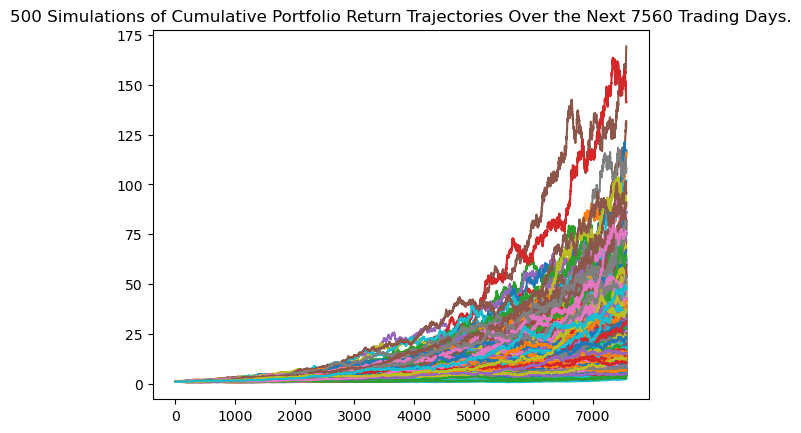

In [89]:
# plot the simulation outcome as a line plot of all different results of the simulation
plot_line = MC_Portfolio.plot_simulation()

# save the plot as a figure for future reference
plot_line.get_figure().savefig("MC_sim_30yr_plot.png", bbox_inches='tight')

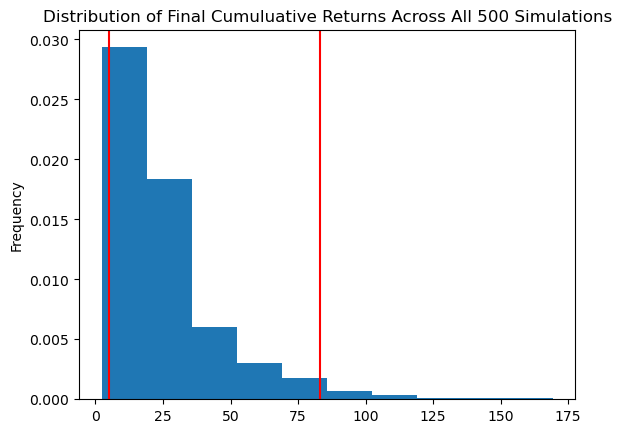

In [90]:
# Plot simulation outcomes
plot_distribution = MC_Portfolio.plot_distribution()

# save the plot as a figure for future reference
plot_distribution.get_figure().savefig("MC_dist_30yr_plot.png", bbox_inches='tight')

### Retirement Analysis

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [91]:
mtrs = MC_Portfolio.summarize_cumulative_return()
mtrs

C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean             25.934409
std              21.689493
min               2.302717
25%              11.726078
50%              19.329735
75%              32.194120
max             169.254485
95% CI Lower      4.821388
95% CI Upper     83.308605
Name: 7560, dtype: float64

In [92]:
# Set initial investment
initial_investment = 20000 * 1.5

mtrs = MC_Portfolio.summarize_cumulative_return()

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * mtrs.loc['95% CI Lower']
ci_upper = initial_investment * mtrs.loc['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio \n"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio 
 over the next 30 years will end within in the range of $144,641.63 and $2,499,258.16


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [93]:
# Configuring a Monte Carlo simulation to forecast 3 years cumulative returns for a period of 5 years
# Get 3 years' worth of historical data for SPY and AGG
# Configuring a Monte Carlo simulation to forecast 5 years retirement option

start_date, end_date = set_cumulative_return_period('2019-01-01', '2021-12-31')


In [94]:
# Running a Monte Carlo simulation to forecast 5 years
# Sample results may vary from the solution based on the time frame chosen

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Set the tickers
tickers = ["AGG", "SPY"]
weights_dist = [0.40, 0.60]

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

# Reorganize the DataFrame
# Separate ticker data
agg_df=df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
spy_df=df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_df, spy_df],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-01-02 05:00:00+00:00  106.55  106.610  106.4701  106.57  11201567   
2019-01-03 05:00:00+00:00  106.57  107.075  106.5700  107.01   6497397   
2019-01-04 05:00:00+00:00  106.66  106.720  106.5500  106.69   8148986   
2019-01-07 05:00:00+00:00  106.72  106.790  106.4600  106.51   7433691   
2019-01-08 05:00:00+00:00  106.40  106.530  106.3800  106.43   4395611   
...                           ...      ...       ...     ...       ...   
2021-12-27 05:00:00+00:00  114.15  114.300  114.1300  114.26   5436338   
2021-12-28 05:00:00+00:00  114.43  114.450  114.1700  114.21   5253785   
2021-12-29 05:00:00+00:00  113.99  114.050  113.8100  113.87   5929458   
2021-12-30 05:00:00+00:00  113.99  114.130  113.8300  114.12   5455434   
2021-12-31 05:00:00+00:00  114.15  114.310  114.0600  114.08   7989476   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-01-02 05:00:00+00:00       27948  106.542414  245.98  251.21  245.95   
2019-01-03 05:00:00+00:00       20215  106.933776  248.23  248.57  243.67   
2019-01-04 05:00:00+00:00       19547  106.639485  247.59  253.11  247.17   
2019-01-07 05:00:00+00:00       23935  106.588915  252.70  255.95  251.69   
2019-01-08 05:00:00+00:00       15476  106.448262  256.82  257.31  254.00   
...                               ...         ...     ...     ...     ...   
2021-12-27 05:00:00+00:00       14793  114.244790  472.06  477.31  472.01   
2021-12-28 05:00:00+00:00       15633  114.296552  477.72  478.81  476.06   
2021-12-29 05:00:00+00:00       17375  113.917371  476.98  478.56  475.92   
2021-12-30 05:00:00+00:00       15929  114.004984  477.93  479.00  475.67   
2021-12-31 05:00:00+00:00       17452  114.148781  475.64  476.86  474.67   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-01-02 05:00:00+00:00  250.23  131471311      603608  249.117597  
2019-01-03 05:00:00+00:00  244.15  146803492      698037  245.630362  
2019-01-04 05:00:00+00:00  252.39  142920211      708777  250.455694  
2019-01-07 05:00:00+00:00  254.29  103705813      449998  254.069565  
2019-01-08 05:00:00+00:00  256.62  103267687      461977  255.845300  
...                           ...        ...         ...         ...  
2021-12-27 05:00:00+00:00  477.26   56689618      379424  475.278749  
2021-12-28 05:00:00+00:00  476.87   47190464      371806  477.232285  
2021-12-29 05:00:00+00:00  477.48   54405126      345000  477.260209  
2021-12-30 05:00:00+00:00  476.16   55320886      353488  477.458812  
2021-12-31 05:00:00+00:00  474.96   65204777      435205  475.617926  

[757 rows x 14 columns]

In [95]:
# Plot simulation outcomes
num_sims = 500
no_years = 5

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_Portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights_dist,
    num_simulation = num_sims,
    num_trading_days = 252*no_years
)
# Print the simulation input data
MC_Portfolio.portfolio_data.head()

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-01-02 05:00:00+00:00  106.55  106.610  106.4701  106.57  11201567   
2019-01-03 05:00:00+00:00  106.57  107.075  106.5700  107.01   6497397   
2019-01-04 05:00:00+00:00  106.66  106.720  106.5500  106.69   8148986   
2019-01-07 05:00:00+00:00  106.72  106.790  106.4600  106.51   7433691   
2019-01-08 05:00:00+00:00  106.40  106.530  106.3800  106.43   4395611   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-01-02 05:00:00+00:00       27948  106.542414          NaN  245.98   
2019-01-03 05:00:00+00:00       20215  106.933776     0.004129  248.23   
2019-01-04 05:00:00+00:00       19547  106.639485    -0.002990  247.59   
2019-01-07 05:00:00+00:00       23935  106.588915    -0.001687  252.70   
2019-01-08 05:00:00+00:00       15476  106.448262    -0.000751  256.82   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2019-01-02 05:00:00+00:00  251.21  245.95  250.23  131471311      603608   
2019-01-03 05:00:00+00:00  248.57  243.67  244.15  146803492      698037   
2019-01-04 05:00:00+00:00  253.11  247.17  252.39  142920211      708777   
2019-01-07 05:00:00+00:00  255.95  251.69  254.29  103705813      449998   
2019-01-08 05:00:00+00:00  257.31  254.00  256.62  103267687      461977   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-01-02 05:00:00+00:00  249.117597          NaN  
2019-01-03 05:00:00+00:00  245.630362    -0.024298  
2019-01-04 05:00:00+00:00  250.455694     0.033750  
2019-01-07 05:00:00+00:00  254.069565     0.007528  
2019-01-08 05:00:00+00:00  255.845300     0.009163

In [96]:
# Plot simulation outcomes
# Running a Monte Carlo simulation to forecast 55 years cumulative returns
simulated_returns_data = MC_Portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 110.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 120.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 130.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 140.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 150.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 160.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 170.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 180.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 190.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 200.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 210.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 220.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 230.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 240.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 250.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 260.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 270.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 280.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 290.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 300.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 310.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 320.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 330.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 340.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 350.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 360.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 370.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 380.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 390.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 400.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 410.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 420.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 430.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 440.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 450.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 460.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 470.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 480.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 490.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

In [97]:
# Fetch summary statistics from the Monte Carlo simulation results
# Compute summary statistics from the simulated daily returns
summary_returns_data = {
    "mean": list(MC_Portfolio.simulated_return.mean(axis=1)),
    "median": list(MC_Portfolio.simulated_return.median(axis=1)),
    "min": list(MC_Portfolio.simulated_return.min(axis=1)),
    "max": list(MC_Portfolio.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994472,1.000734,0.991537,0.996331,1.000384,0.991457,1.010886,0.998082,0.989900,0.999930,...,0.995532,0.979147,0.993878,0.995575,1.004823,1.012873,1.004558,1.005017,0.998705,0.983391
2,0.981474,0.985566,0.996659,0.994977,1.000647,0.992595,1.011150,0.981002,1.007571,1.003083,...,1.003426,0.985103,1.008124,0.996804,1.007405,1.009560,1.007995,0.991699,1.001822,0.981670
3,0.975238,0.981522,1.003465,0.994437,0.987832,0.991922,1.016818,0.974419,1.015105,1.016852,...,1.011842,0.965364,1.021846,1.013875,1.001789,1.019742,0.999756,0.984033,0.995180,0.984204
4,0.967327,0.986083,1.004106,1.009452,0.985138,1.003085,1.004731,0.974851,1.006062,1.028305,...,1.009152,0.965639,1.028172,1.013826,0.990423,1.020980,0.986015,0.978506,0.977311,0.998048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.958253,1.836966,2.912529,1.466309,2.358500,2.853575,2.095537,2.040508,1.914179,3.976244,...,2.006776,3.285668,2.791062,2.076622,1.756789,2.411605,2.883531,1.779996,1.750383,1.879868
1257,1.953427,1.835268,2.931871,1.468238,2.343189,2.855747,2.092174,2.062618,1.920129,3.944902,...,2.011829,3.221738,2.783189,2.072843,1.764982,2.408344,2.861017,1.753643,1.754464,1.890516
1258,1.952621,1.868458,2.959747,1.449458,2.369620,2.848434,2.085476,2.058865,1.920567,3.993252,...,2.027737,3.217205,2.758230,2.051814,1.767887,2.398950,2.876321,1.791372,1.795621,1.928809
1259,1.971064,1.895988,2.931193,1.444552,2.361410,2.839151,2.091192,2.080465,1.926797,3.934657,...,2.022114,3.213468,2.753318,2.065635,1.755596,2.397945,2.855366,1.804921,1.792004,1.931623


In [98]:
# # Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(summary_returns_data)

# # Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000068,1.000172,0.971793,1.024692
2,1.000330,1.000626,0.967971,1.039348
3,1.000754,1.000674,0.961415,1.040938
4,1.001334,1.001954,0.952513,1.043539


In [99]:
# Print summary statistics
df_simulated_returns.mean()

mean      1.521461
median    1.490437
min       0.792908
max       2.663867
dtype: float64

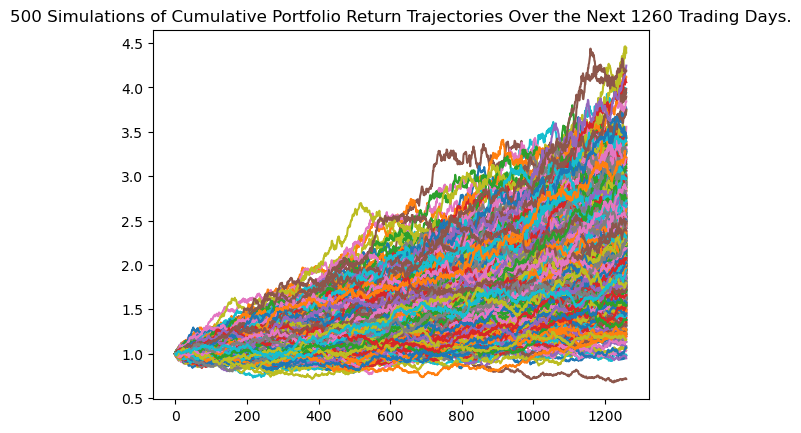

In [100]:
# plot the simulation outcome as a line plot of all different results of the simulation
plot_line = MC_Portfolio.plot_simulation()

# save the plot as a figure for future reference
plot_line.get_figure().savefig("MC_sim_5yr_dr.png", bbox_inches='tight')

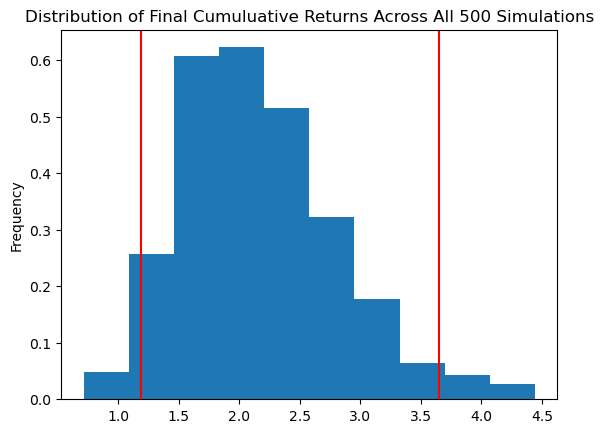

In [101]:
# Plot probability distribution and confidence intervals
plot_distribution = MC_Portfolio.plot_distribution()

# save the plot as a figure for future reference
plot_line.get_figure().savefig("MC_sim_5yr_dr.png", bbox_inches='tight')

In [102]:
# Set initial investment
initial_investment = 20000 * 3

mtrs = MC_Portfolio.summarize_cumulative_return()

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = initial_investment * mtrs.loc['95% CI Lower']
ci_upper_five = initial_investment * mtrs.loc['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio \n"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2F} and ${ci_upper_five:,.2F}")

There is a 95% chance that an initial investment of $60000 in the portfolio 
 over the next 5 years will end within in the range of $71,135.84 and $219,063.45


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Ten Years Retirement Option

In [103]:
# Configuring a Monte Carlo simulation to forecast 3 years cumulative returns for a period of 10 years
# Get 3 years' worth of historical data for SPY and AGG
# Configuring a Monte Carlo simulation to forecast 10 years retirement option

start_date, end_date = set_cumulative_return_period('2019-01-01', '2022-12-31')

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Set the tickers
tickers = ["AGG", "SPY"]
weights_dist = [0.40, 0.60]

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

# Reorganize the DataFrame
# Separate ticker data
agg_df=df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
spy_df=df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_df, spy_df],axis=1, keys=['AGG','SPY'])

# *** The Alpaca API only provides 7 years of data on its free api. That's is why there is not a more significant difference betwwen the 5 yr cumulative return and the
# 10-yr cumulative return.
df_stock_data

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-01-02 05:00:00+00:00  106.55  106.610  106.4701  106.57  11201567   
2019-01-03 05:00:00+00:00  106.57  107.075  106.5700  107.01   6497397   
2019-01-04 05:00:00+00:00  106.66  106.720  106.5500  106.69   8148986   
2019-01-07 05:00:00+00:00  106.72  106.790  106.4600  106.51   7433691   
2019-01-08 05:00:00+00:00  106.40  106.530  106.3800  106.43   4395611   
...                           ...      ...       ...     ...       ...   
2022-12-23 05:00:00+00:00   98.05   98.110   97.8950   97.97   4761697   
2022-12-27 05:00:00+00:00   97.46   97.615   97.2121   97.26   7922269   
2022-12-28 05:00:00+00:00   97.47   97.500   97.0800   97.09  12129529   
2022-12-29 05:00:00+00:00   97.21   97.470   97.1825   97.45   7475702   
2022-12-30 05:00:00+00:00   97.25   97.360   96.9741   96.99   8460107   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-01-02 05:00:00+00:00       27948  106.542414  245.98  251.21  245.95   
2019-01-03 05:00:00+00:00       20215  106.933776  248.23  248.57  243.67   
2019-01-04 05:00:00+00:00       19547  106.639485  247.59  253.11  247.17   
2019-01-07 05:00:00+00:00       23935  106.588915  252.70  255.95  251.69   
2019-01-08 05:00:00+00:00       15476  106.448262  256.82  257.31  254.00   
...                               ...         ...     ...     ...     ...   
2022-12-23 05:00:00+00:00       17054   97.980418  379.65  383.06  378.03   
2022-12-27 05:00:00+00:00       28214   97.353687  382.79  383.15  379.65   
2022-12-28 05:00:00+00:00       25595   97.269523  381.33  383.39  376.42   
2022-12-29 05:00:00+00:00       21522   97.335261  379.63  384.35  379.08   
2022-12-30 05:00:00+00:00       29791   97.066805  380.64  382.58  378.43   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-01-02 05:00:00+00:00  250.23  131471311      603608  249.117597  
2019-01-03 05:00:00+00:00  244.15  146803492      698037  245.630362  
2019-01-04 05:00:00+00:00  252.39  142920211      708777  250.455694  
2019-01-07 05:00:00+00:00  254.29  103705813      449998  254.069565  
2019-01-08 05:00:00+00:00  256.62  103267687      461977  255.845300  
...                           ...        ...         ...         ...  
2022-12-23 05:00:00+00:00  382.91   58757557      441157  381.501493  
2022-12-27 05:00:00+00:00  381.40   51494435      427772  381.776690  
2022-12-28 05:00:00+00:00  376.66   70660057      500857  379.062108  
2022-12-29 05:00:00+00:00  383.44   64517045      480519  382.399055  
2022-12-30 05:00:00+00:00  382.43   83474793      544591  381.220108  

[1008 rows x 14 columns]

In [104]:
# Configuring a Monte Carlo simulation to forecast 10 years retirement option
# Set number of simulations
num_sims = 500
no_years = 10

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_Portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights_dist,
    num_simulation = num_sims,
    num_trading_days = 252*no_years
)

# Print the simulation input data
MC_Portfolio.portfolio_data.head()

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-01-02 05:00:00+00:00  106.55  106.610  106.4701  106.57  11201567   
2019-01-03 05:00:00+00:00  106.57  107.075  106.5700  107.01   6497397   
2019-01-04 05:00:00+00:00  106.66  106.720  106.5500  106.69   8148986   
2019-01-07 05:00:00+00:00  106.72  106.790  106.4600  106.51   7433691   
2019-01-08 05:00:00+00:00  106.40  106.530  106.3800  106.43   4395611   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-01-02 05:00:00+00:00       27948  106.542414          NaN  245.98   
2019-01-03 05:00:00+00:00       20215  106.933776     0.004129  248.23   
2019-01-04 05:00:00+00:00       19547  106.639485    -0.002990  247.59   
2019-01-07 05:00:00+00:00       23935  106.588915    -0.001687  252.70   
2019-01-08 05:00:00+00:00       15476  106.448262    -0.000751  256.82   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2019-01-02 05:00:00+00:00  251.21  245.95  250.23  131471311      603608   
2019-01-03 05:00:00+00:00  248.57  243.67  244.15  146803492      698037   
2019-01-04 05:00:00+00:00  253.11  247.17  252.39  142920211      708777   
2019-01-07 05:00:00+00:00  255.95  251.69  254.29  103705813      449998   
2019-01-08 05:00:00+00:00  257.31  254.00  256.62  103267687      461977   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-01-02 05:00:00+00:00  249.117597          NaN  
2019-01-03 05:00:00+00:00  245.630362    -0.024298  
2019-01-04 05:00:00+00:00  250.455694     0.033750  
2019-01-07 05:00:00+00:00  254.069565     0.007528  
2019-01-08 05:00:00+00:00  255.845300     0.009163

In [105]:
# Plot simulation outcomes
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
simulated_returns_data = MC_Portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 110.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 120.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 130.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 140.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 150.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 160.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 170.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 180.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 190.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 200.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 210.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 220.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 230.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 240.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 250.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 260.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 270.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 280.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 290.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 300.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 310.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 320.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 330.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 340.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 350.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 360.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 370.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 380.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 390.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 400.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 410.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 420.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 430.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 440.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 450.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 460.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 470.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 480.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

Running Monte Carlo simulation number 490.


C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Isidrojl\Documents\UM FinTech\Challenges\module_5_challenge\I

In [106]:
# Fetch summary statistics from the Monte Carlo simulation results
# Compute summary statistics from the simulated daily returns
summary_returns_data = {
    "mean": list(MC_Portfolio.simulated_return.mean(axis=1)),
    "median": list(MC_Portfolio.simulated_return.median(axis=1)),
    "min": list(MC_Portfolio.simulated_return.min(axis=1)),
    "max": list(MC_Portfolio.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002647,1.007975,1.003974,1.009468,0.993344,0.991840,1.002078,1.003026,0.996605,1.011869,...,1.005599,0.998059,1.013656,1.002137,0.996847,1.003908,0.994811,0.995073,1.017756,0.993763
2,1.017428,1.010090,1.007747,1.009110,0.992229,0.988908,0.995701,1.006368,0.995203,1.017854,...,1.004777,0.993662,1.024590,0.988592,1.009491,1.002414,1.001526,0.994134,1.015969,0.996204
3,1.028680,1.016497,1.015723,1.007940,0.986434,0.989849,1.009878,1.002010,0.984472,1.016616,...,1.013374,0.996834,1.029498,1.001352,1.005851,0.999760,0.985265,0.998125,1.005356,0.988016
4,1.022732,1.007889,1.023579,1.002762,0.972652,0.995774,1.007680,0.998237,0.990731,1.018659,...,1.032883,0.981323,1.047208,0.989943,0.996239,0.999626,0.985247,1.002108,1.014845,0.987371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.529857,4.251540,0.894161,1.280650,4.052593,2.290299,1.542816,1.785694,1.219782,2.182479,...,1.875686,1.314052,2.311505,2.167329,1.391535,1.599484,2.392566,1.233020,4.079222,1.290122
2517,2.550450,4.274633,0.895479,1.280223,4.041014,2.288221,1.512774,1.775936,1.202810,2.183788,...,1.881284,1.310435,2.307906,2.164574,1.404139,1.593296,2.358606,1.225834,4.131372,1.281741
2518,2.575515,4.278074,0.892104,1.276101,4.013954,2.266734,1.505394,1.781363,1.205149,2.219674,...,1.893144,1.293032,2.301917,2.151055,1.403217,1.589280,2.410127,1.226439,4.121418,1.285852
2519,2.565168,4.283360,0.889977,1.279474,3.913506,2.254192,1.502319,1.779284,1.204282,2.241762,...,1.887766,1.268288,2.313014,2.178860,1.405303,1.590592,2.439991,1.224677,4.106471,1.291902


In [107]:
# # Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(summary_returns_data)

# # Display sample data
df_simulated_returns

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000663,1.000778,0.976785,1.024817
2,1.000469,0.999694,0.968547,1.035986
3,1.001983,1.001473,0.958580,1.041924
4,1.002435,1.001968,0.961918,1.047433
...,...,...,...,...
2516,2.011542,1.860200,0.444680,6.542091
2517,2.012891,1.859544,0.444199,6.496993
2518,2.013011,1.864080,0.445248,6.516920
2519,2.013293,1.863564,0.448167,6.533437


In [108]:
# Print summary statistics
df_simulated_returns.mean()

mean      1.429422
median    1.369170
min       0.531774
max       3.774616
dtype: float64

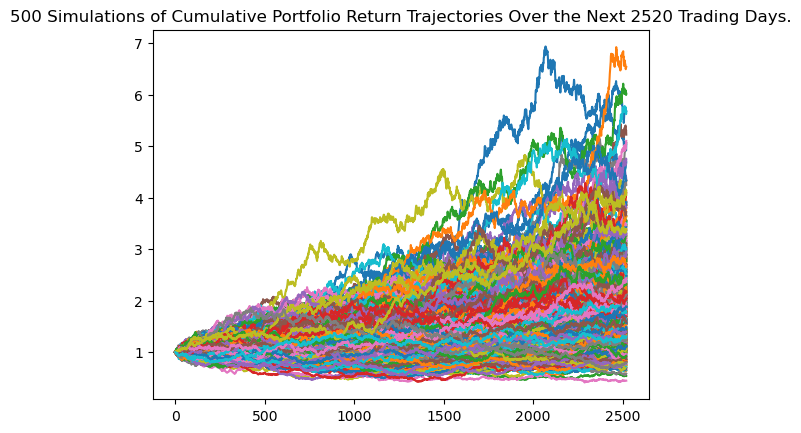

In [109]:
# plot the simulation outcome as a line plot of all different results of the simulation
plot_line = MC_Portfolio.plot_simulation()

# save the plot as a figure for future reference
plot_line.get_figure().savefig("MC_sim_10yr_dr.png", bbox_inches='tight')

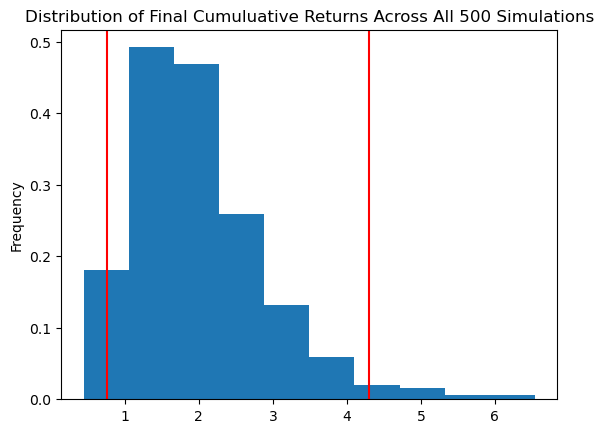

In [110]:
# Plot probability distribution and confidence intervals
# Plot simulation outcomes
plot_distribution = MC_Portfolio.plot_distribution()

# save the plot as a figure for future reference
plot_distribution.get_figure().savefig("MC_dist_10yr_dr.png", bbox_inches='tight')

In [111]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_ten = initial_investment * mtrs.loc['95% CI Lower']
ci_upper_ten = initial_investment * mtrs.loc['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio \n"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio 
 over the next 10 years will end within in the range of $71,135.84 and $219,063.45
